In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# set working directory
import os
os.chdir("..")

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import json
from transformers import AutoTokenizer
import scipy
import seaborn as sns
import pandas as pd

from utils.notebooks_utils import read_data, aggregate_token_scores, plot_correlations, plot_effect_against_bias, plot_linear_coefficients


Load the data from pre-computed casual effects

In [4]:
n_examples = "all"
parameter_size = 13
data_path = os.path.join("/home/limisiewicz/my-luster/GenderBiasGACR/results", f"results_known_{parameter_size}B_disable_mlp_{n_examples}.jsonl")

# load jsons line by line
data = []
with open(data_path, "r") as f:
    for line in f:
        data.append(json.loads(line))

load llama tokenizer

In [5]:

llama_path = f"/home/limisiewicz/my-luster/GenderBiasGACR/models/llama_{parameter_size}B"

tokenizer = AutoTokenizer.from_pretrained(llama_path , add_bos_token=False, use_fast=False)

In [6]:

for kind in ["null", "mlp", "attn"]:
    for data_row in data:
        data_row[kind]["scores_aggregated"] = aggregate_token_scores(data_row, tokenizer, kind=kind)

Load the crowd-sourced factual ans sterotypical scores.

In [7]:
prof_data_path = os.path.join("/home/limisiewicz/my-luster/GenderBiasGACR/data", f"professions.json")

# load json data
with open(prof_data_path, "r") as f:
    professions = json.load(f)

professions = {prof: {'factual': f, 'stereotypical': s} for (prof, f, s)  in professions}


function for plotting bias against indirect effect scores

Check correlations by layer and token position (kind of representation)

Maximal difference in Spearman correlation F > S at layer 24 at Last subject token
Stereotypical r=0.345507
Factual r=0.450792
Maximal difference in Spearman correlation S > F  at layer 0 at Further tokens
Stereotypical r=0.033458
Factual r=0.046911
 Total effect correlations
stereotypical:  0.4601625212718243
factual:  0.5156328546080509


/home/limisiewicz/my-luster/dama/DAMA/src/utils/notebooks_utils.py:338: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


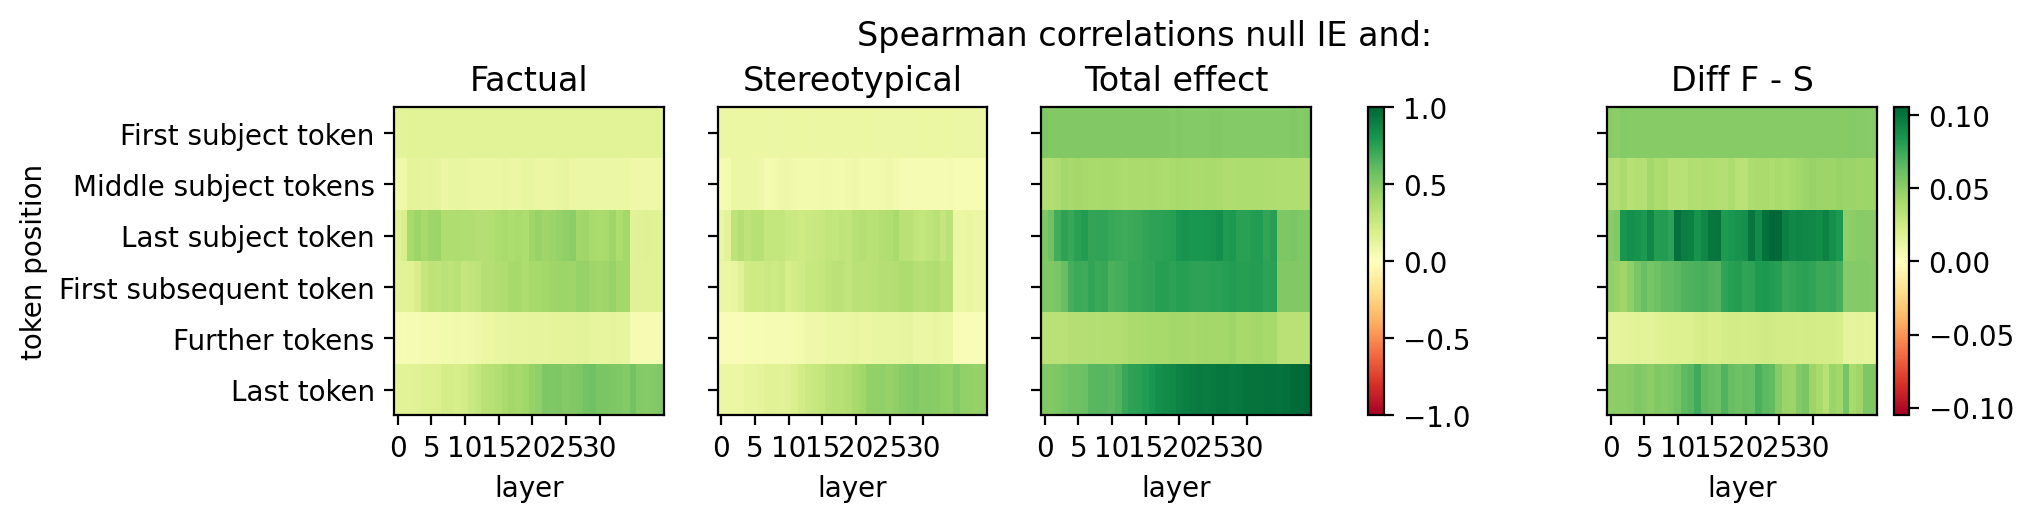

In [8]:
plot_correlations(data, professions, kind="null")

 Total effect coefficients
stereotypical:  [0.27447646 0.11458037]
factual:  [0.43715888 0.15513327]


/home/limisiewicz/my-luster/dama/DAMA/src/utils/notebooks_utils.py:454: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)
/home/limisiewicz/my-luster/dama/DAMA/src/utils/notebooks_utils.py:496: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[4].set_yticklabels(TOKEN_POSITION_MAP)
/home/limisiewicz/my-luster/dama/DAMA/src/utils/notebooks_utils.py:536: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[8].set_yticklabels(TOKEN_POSITION_MAP)


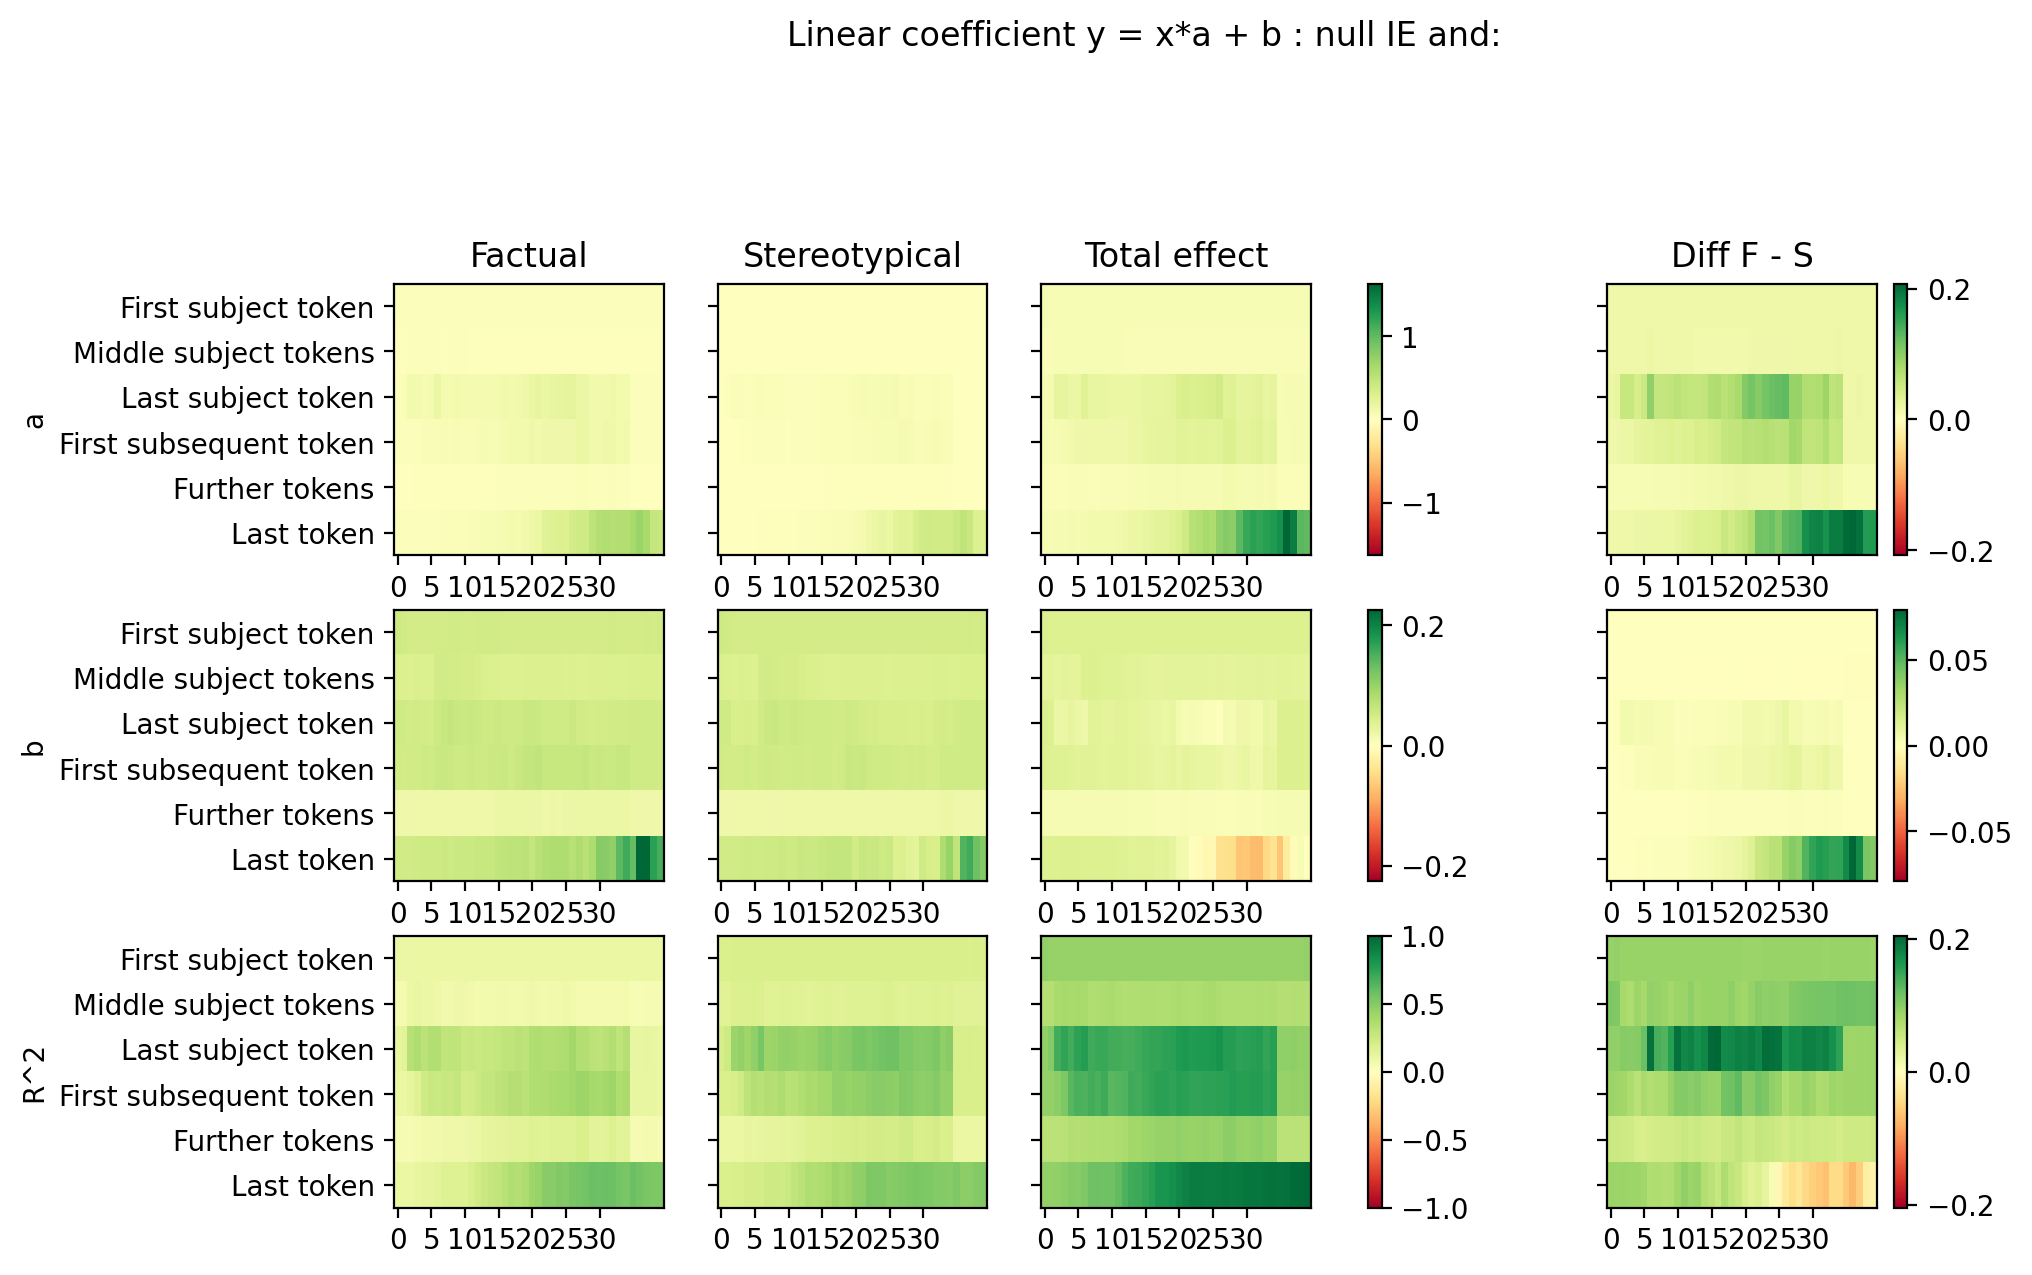

In [9]:
plot_linear_coefficients(data, professions, kind="null")

Maximal difference in Spearman correlation F > S at layer 7 at Last subject token
Stereotypical r=0.351229
Factual r=0.455463
Maximal difference in Spearman correlation S > F  at layer 9 at First subsequent token
Stereotypical r=0.030803
Factual r=0.003128
 Total effect correlations
stereotypical:  0.4601625212718243
factual:  0.5156328546080509


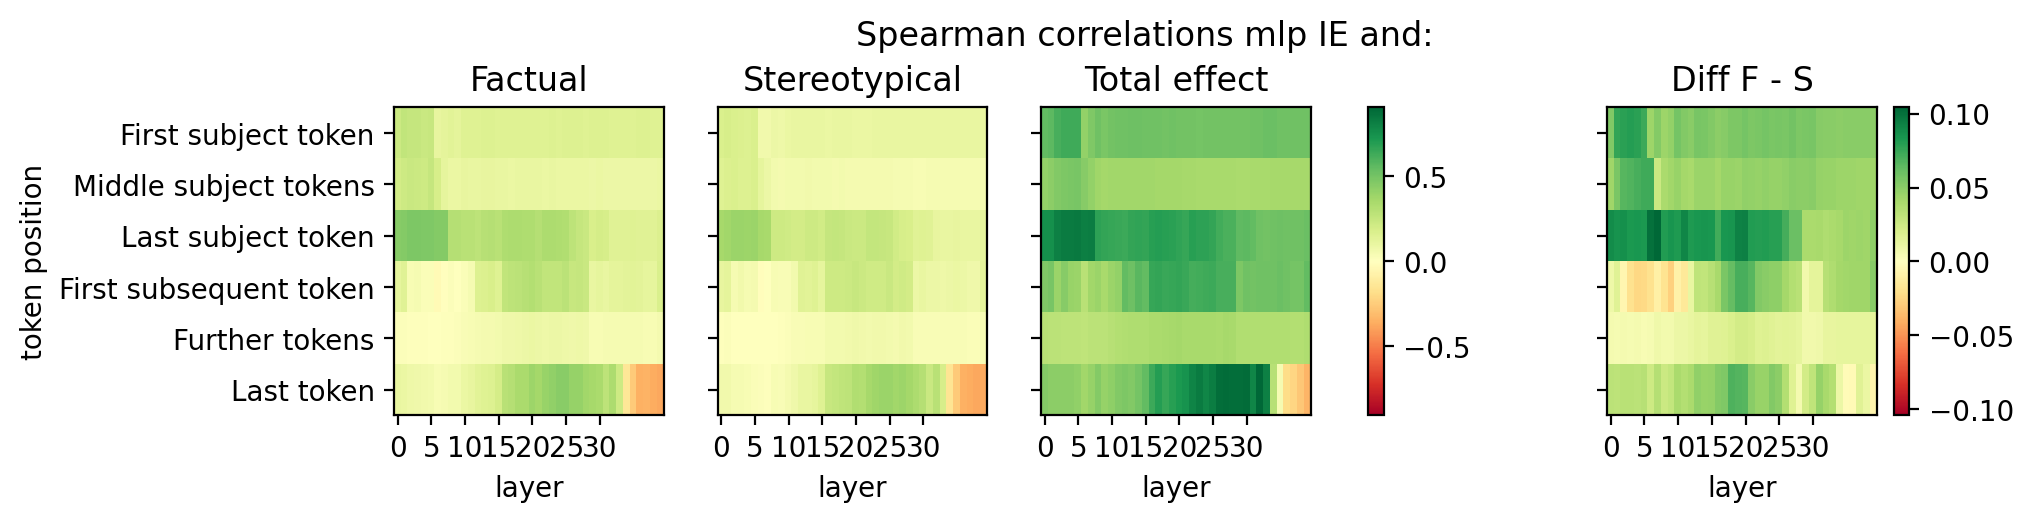

In [10]:
plot_correlations(data, professions, kind="mlp")

 Total effect coefficients
stereotypical:  [0.27447646 0.11458037]
factual:  [0.43715888 0.15513327]


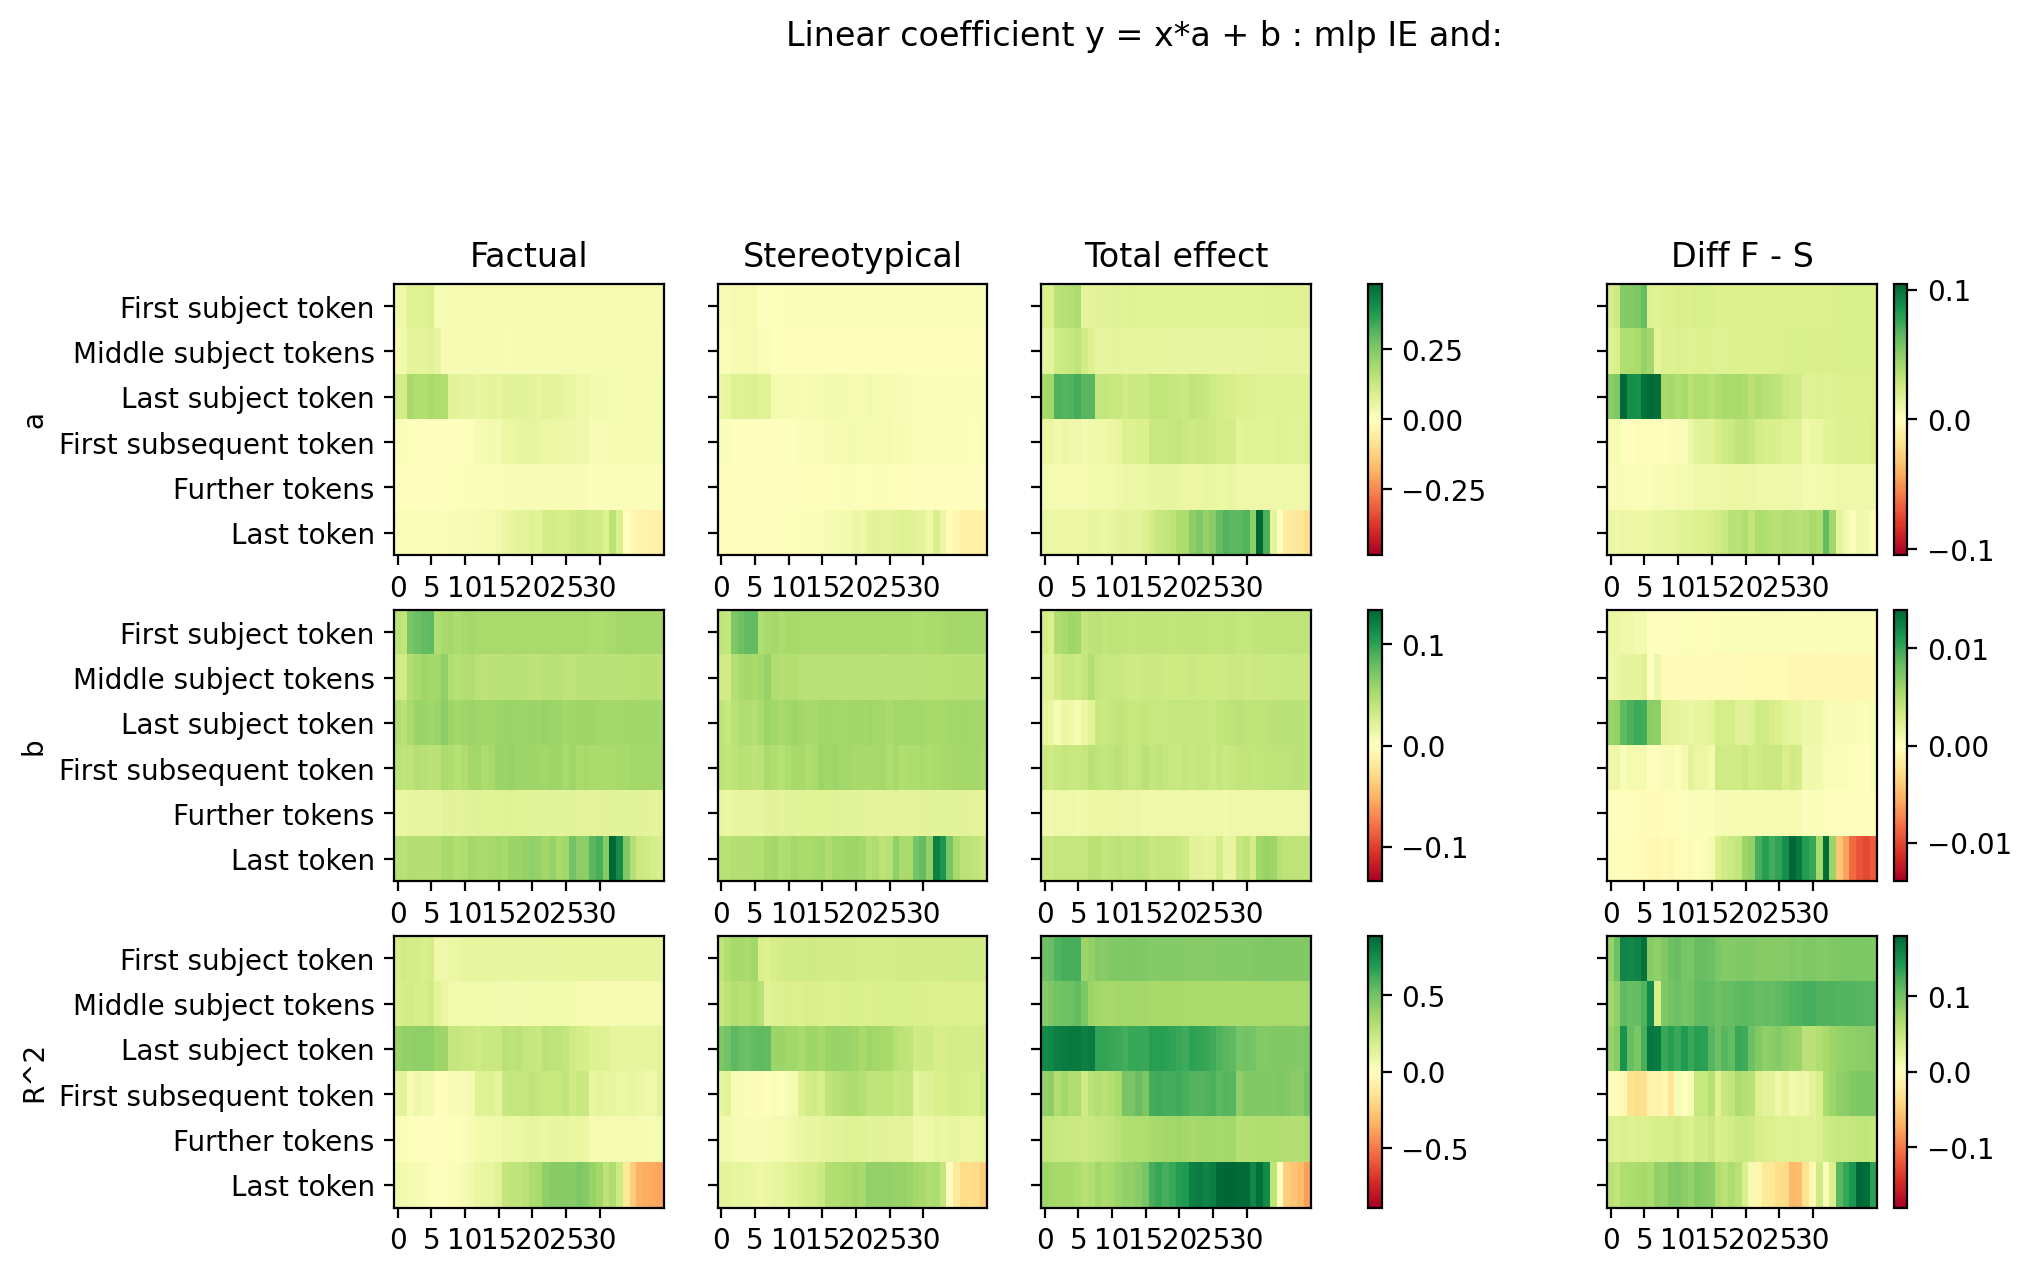

In [11]:
plot_linear_coefficients(data, professions, kind="mlp")

Maximal difference in Spearman correlation F > S at layer 38 at Last token
Stereotypical r=0.469867
Factual r=0.555622
Maximal difference in Spearman correlation S > F  at layer 38 at Further tokens
Stereotypical r=0.032087
Factual r=0.044957
 Total effect correlations
stereotypical:  0.4601625212718243
factual:  0.5156328546080509


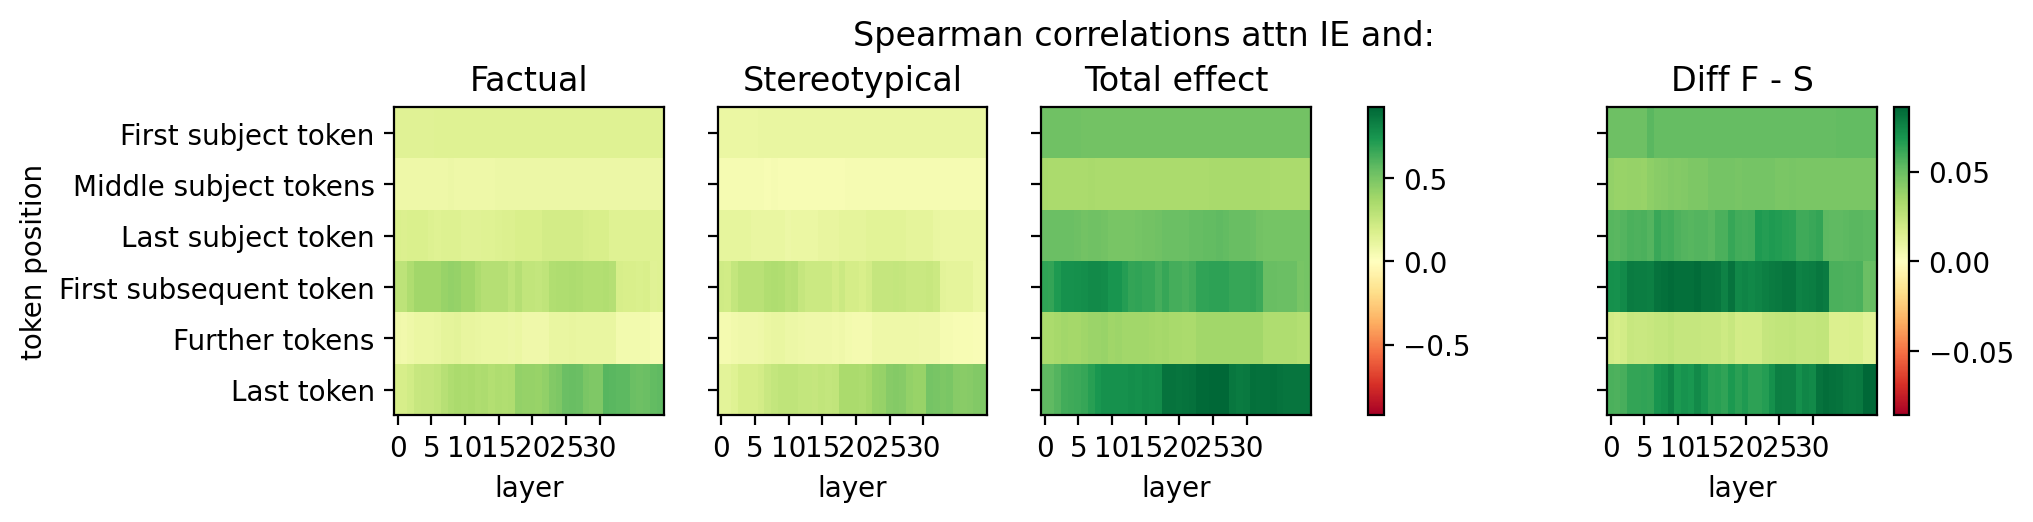

In [12]:
plot_correlations(data, professions, kind="attn")

 Total effect coefficients
stereotypical:  [0.27447646 0.11458037]
factual:  [0.43715888 0.15513327]


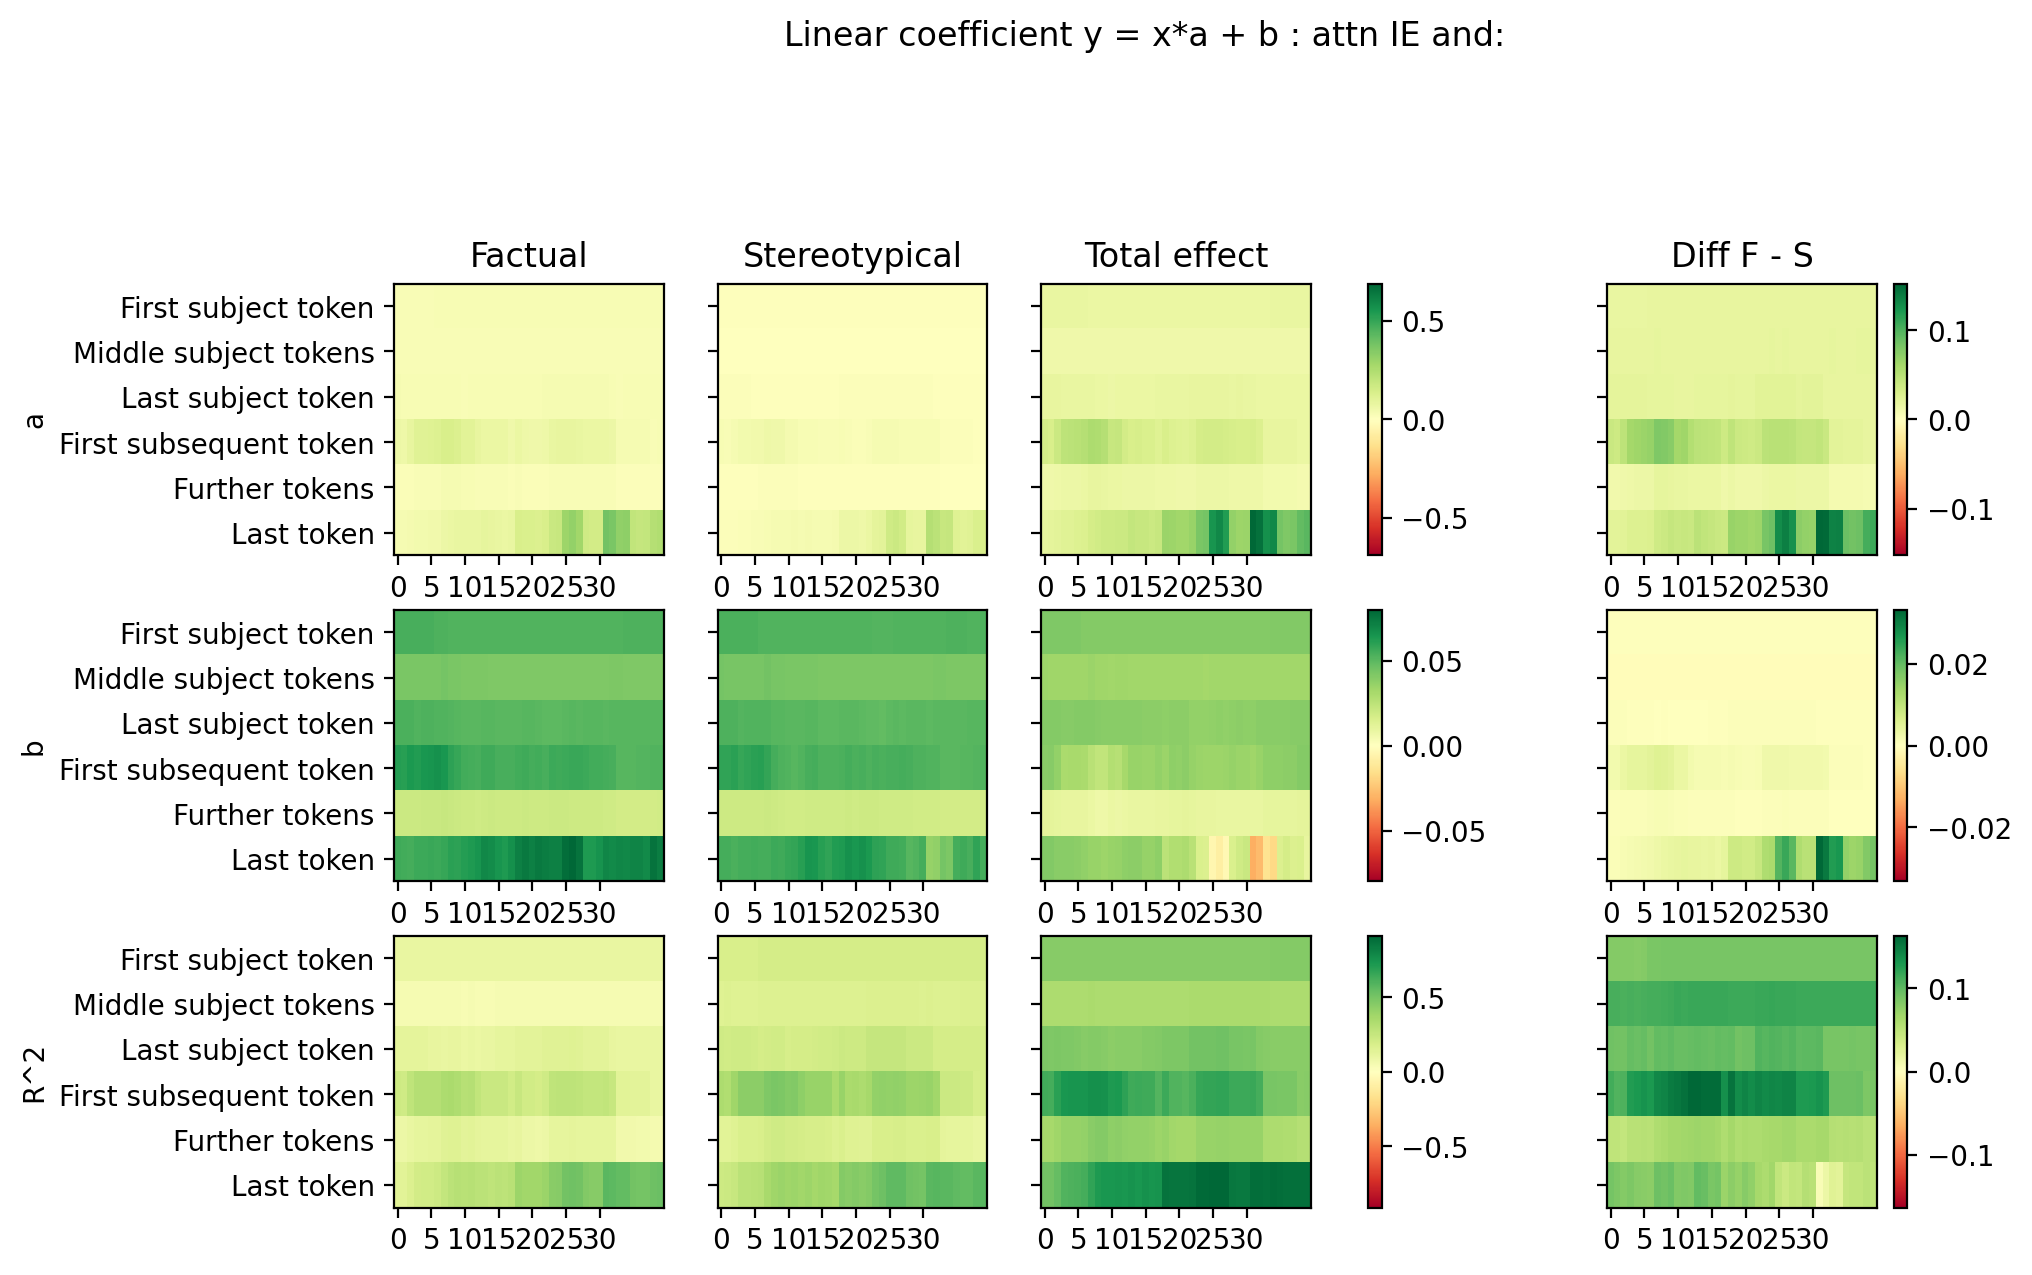

In [13]:
plot_linear_coefficients(data, professions, kind="attn")

Plotting MLP IE against bias scores:

Plotting mlp at layer 5


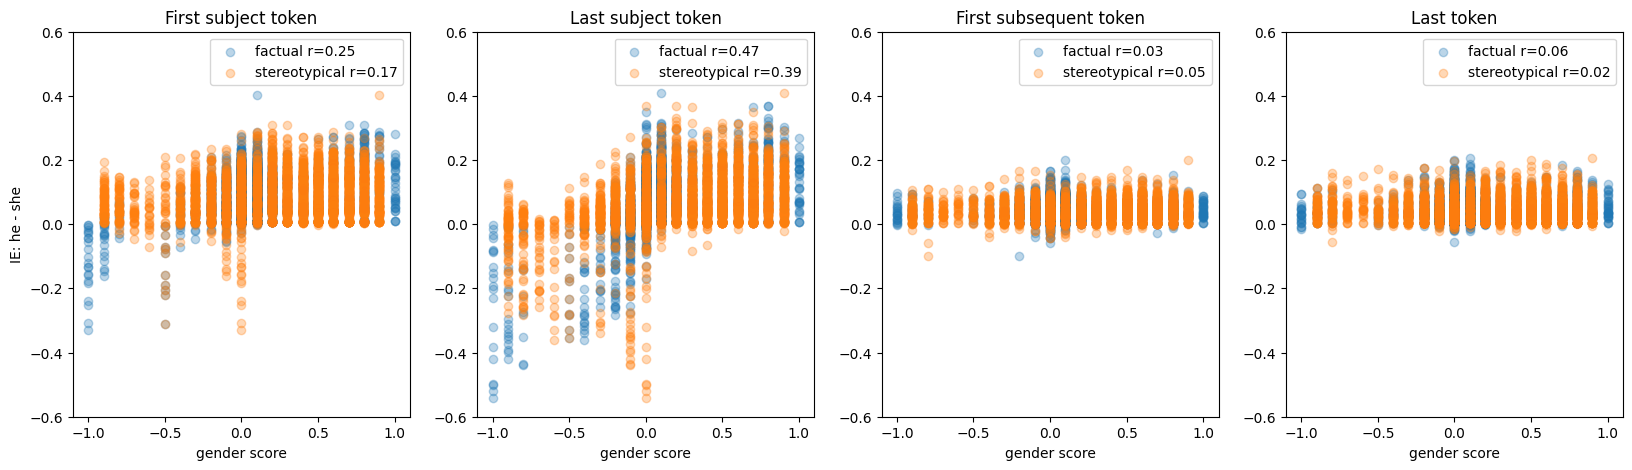

In [14]:
plot_effect_against_bias(data, professions, kind="mlp", layer=5)

Plotting mlp at layer 15


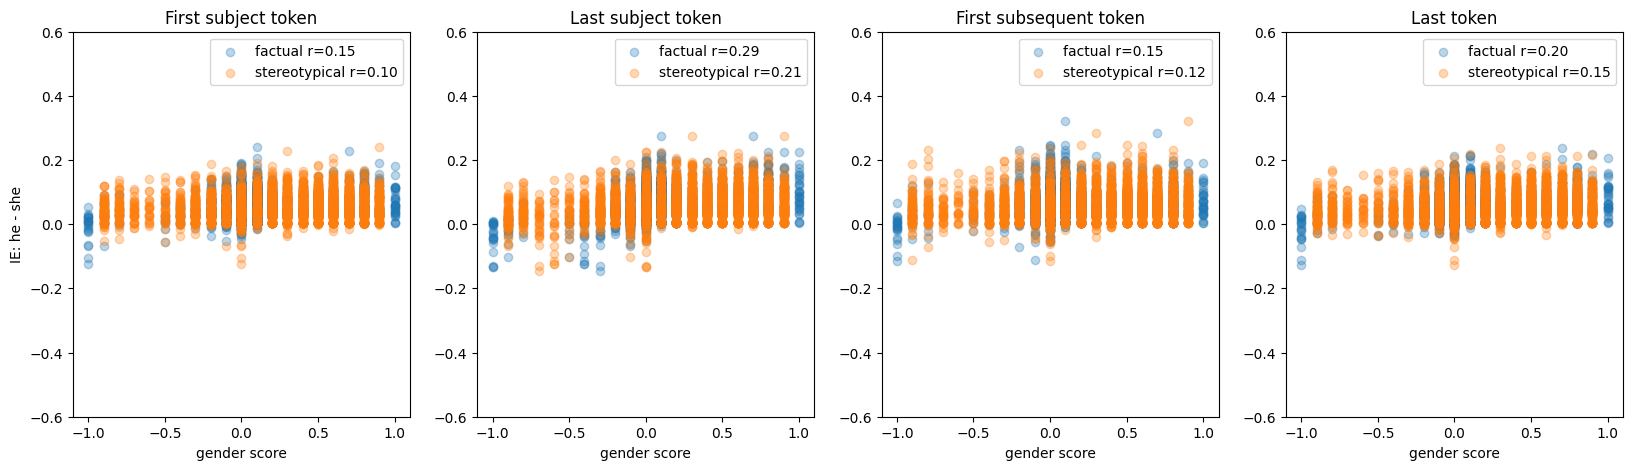

In [15]:
plot_effect_against_bias(data, professions, kind="mlp", layer=15)

Plotting mlp at layer 19


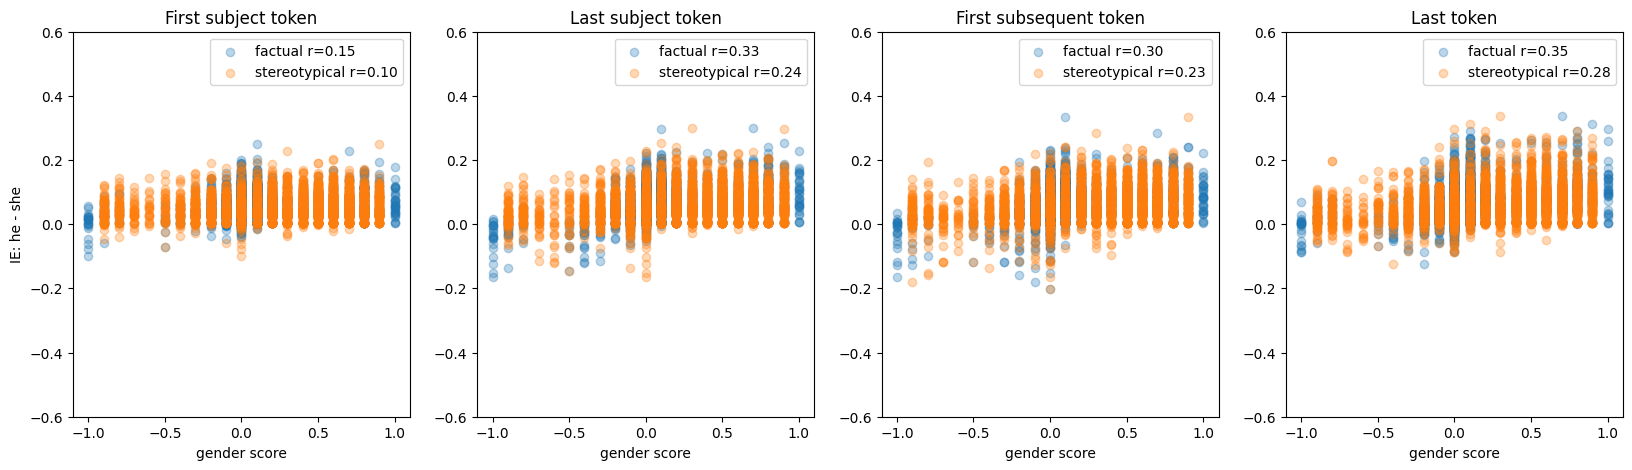

In [16]:

plot_effect_against_bias(data, professions, kind="mlp", layer=19)

Plotting mlp at layer 20


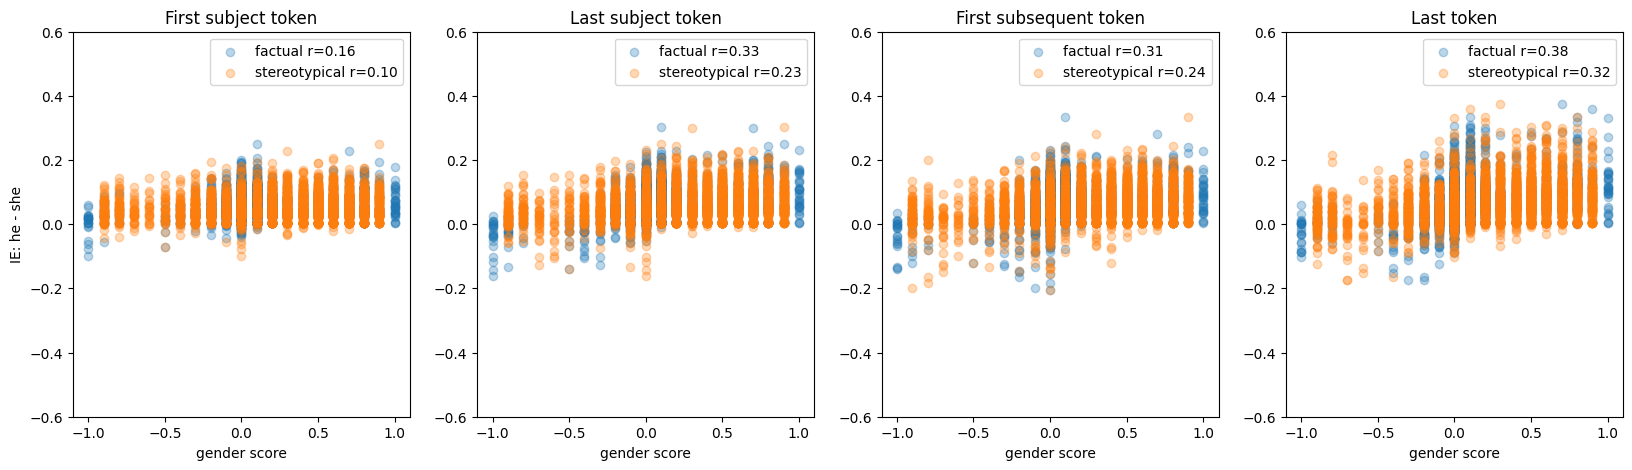

In [17]:
plot_effect_against_bias(data, professions, kind="mlp", layer=20)

Plotting mlp at layer 21


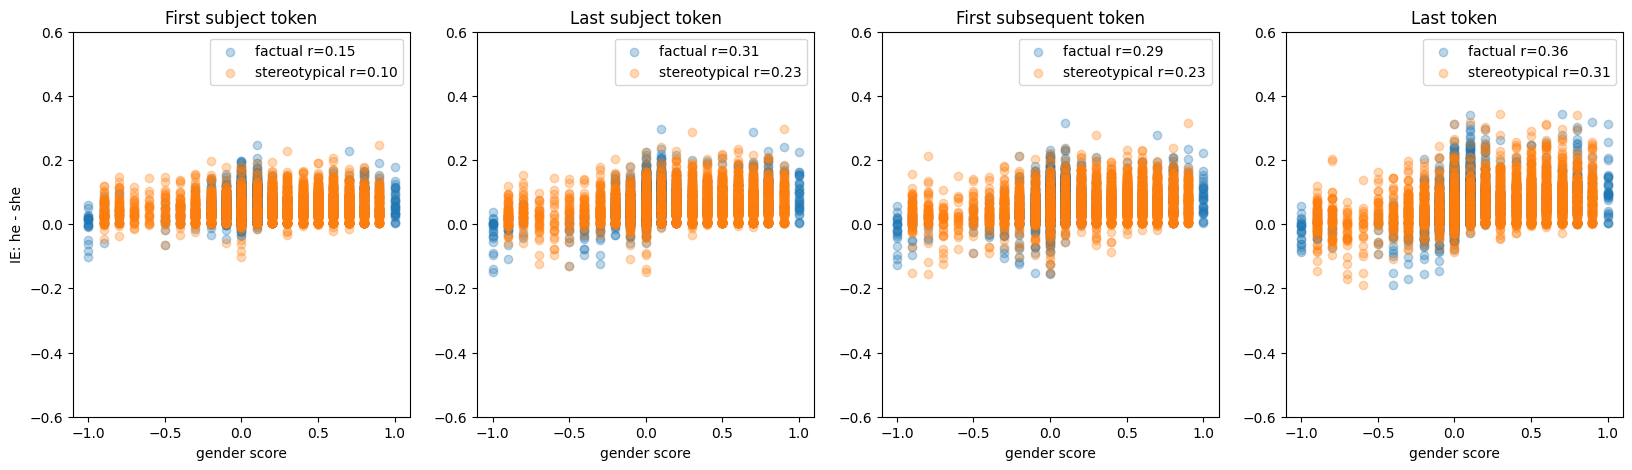

In [18]:

plot_effect_against_bias(data, professions, kind="mlp", layer=21)

Plotting mlp at layer 23


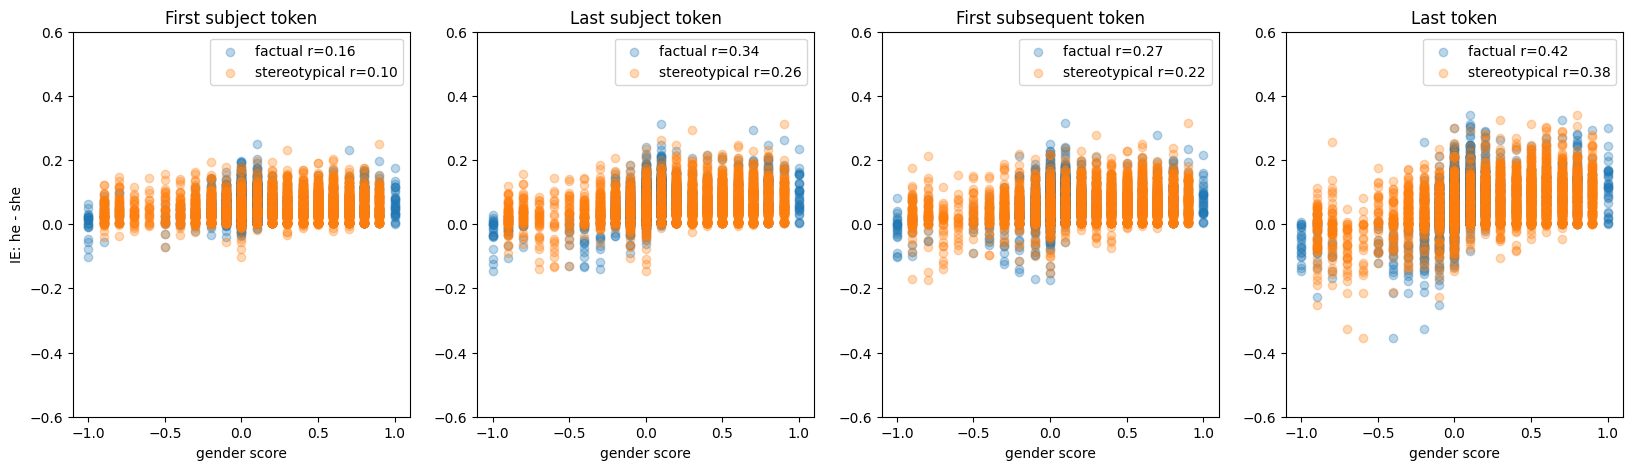

In [19]:
plot_effect_against_bias(data, professions, kind="mlp", layer=23)

Plotting mlp at layer 24


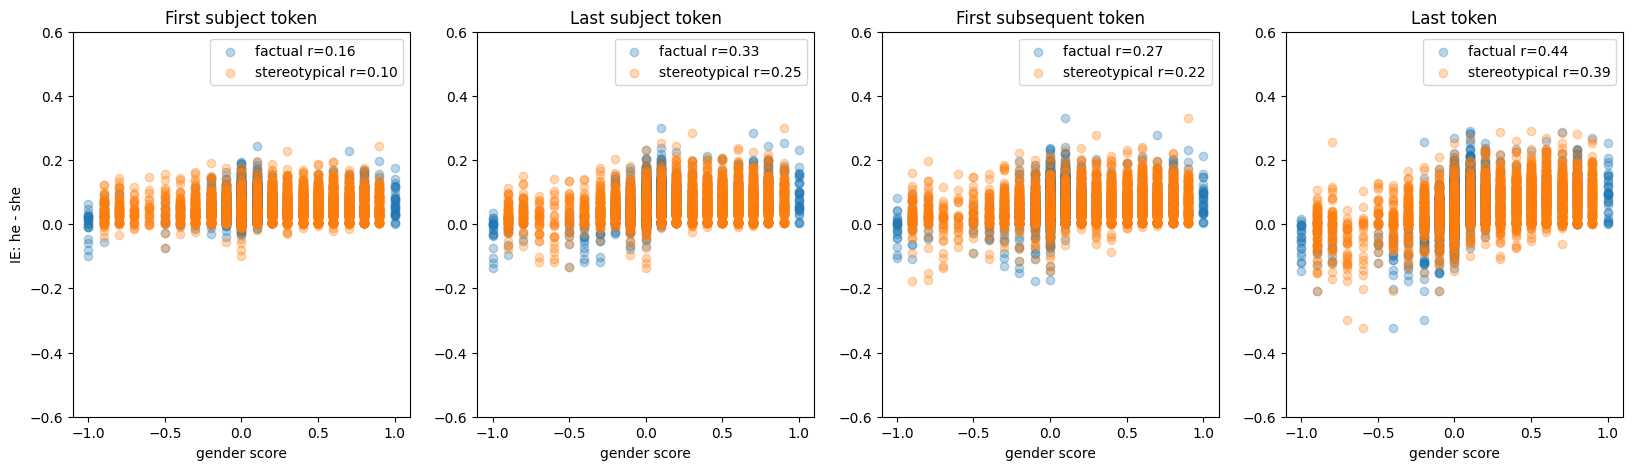

In [20]:
plot_effect_against_bias(data, professions, kind="mlp", layer=24)

Plotting mlp at layer 25


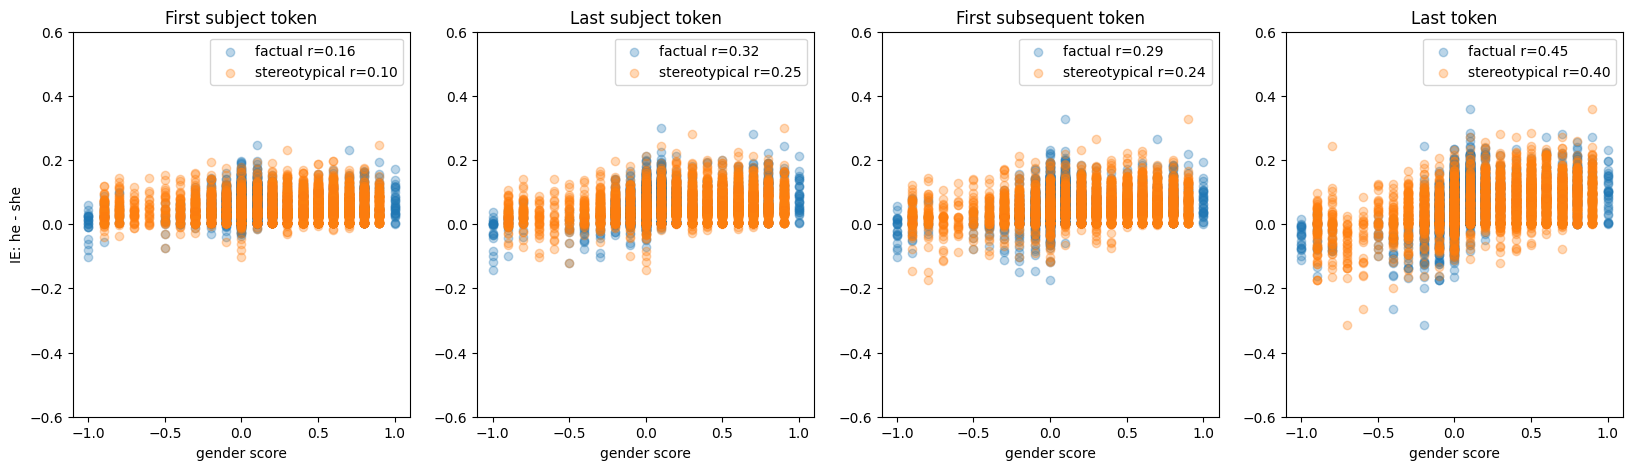

In [21]:
plot_effect_against_bias(data, professions, kind="mlp", layer=25)

Plotting mlp at layer 26


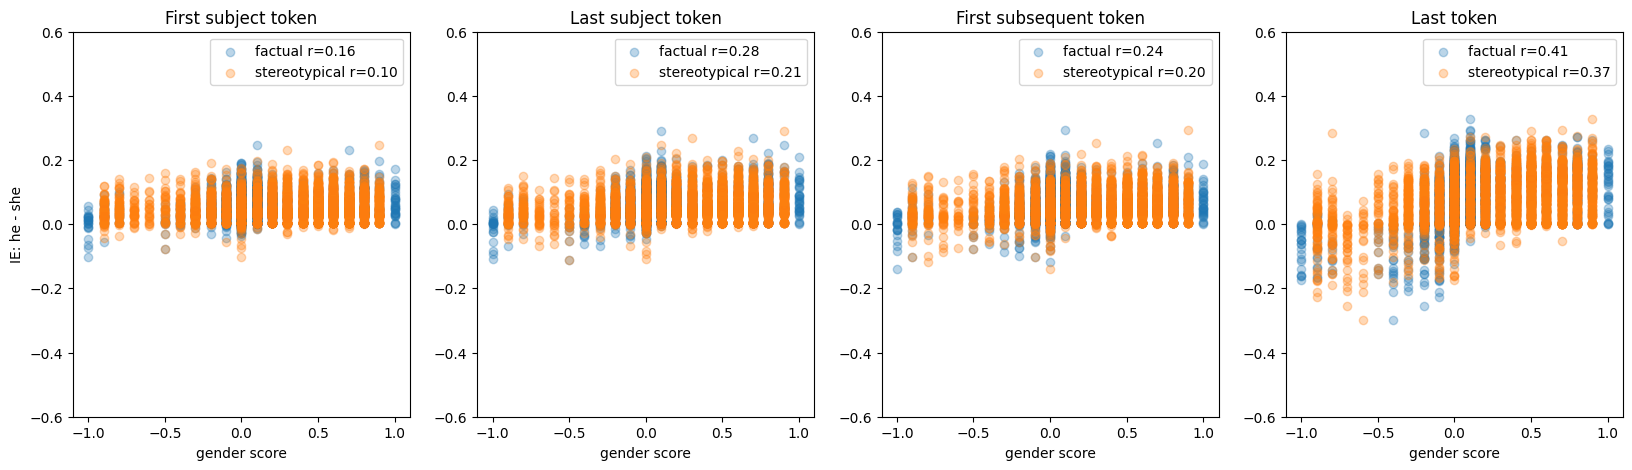

In [22]:
plot_effect_against_bias(data, professions, kind="mlp", layer=26)

Plotting mlp at layer 26


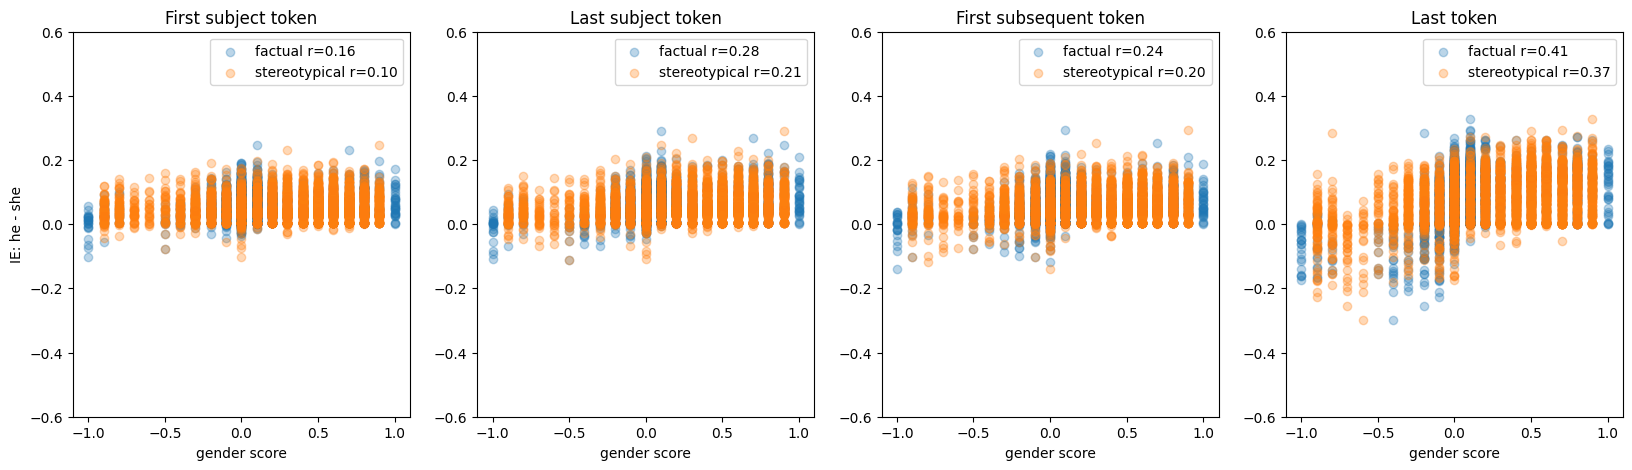

In [23]:
plot_effect_against_bias(data, professions, kind="mlp", layer=26)

Plotting mlp at layer 28


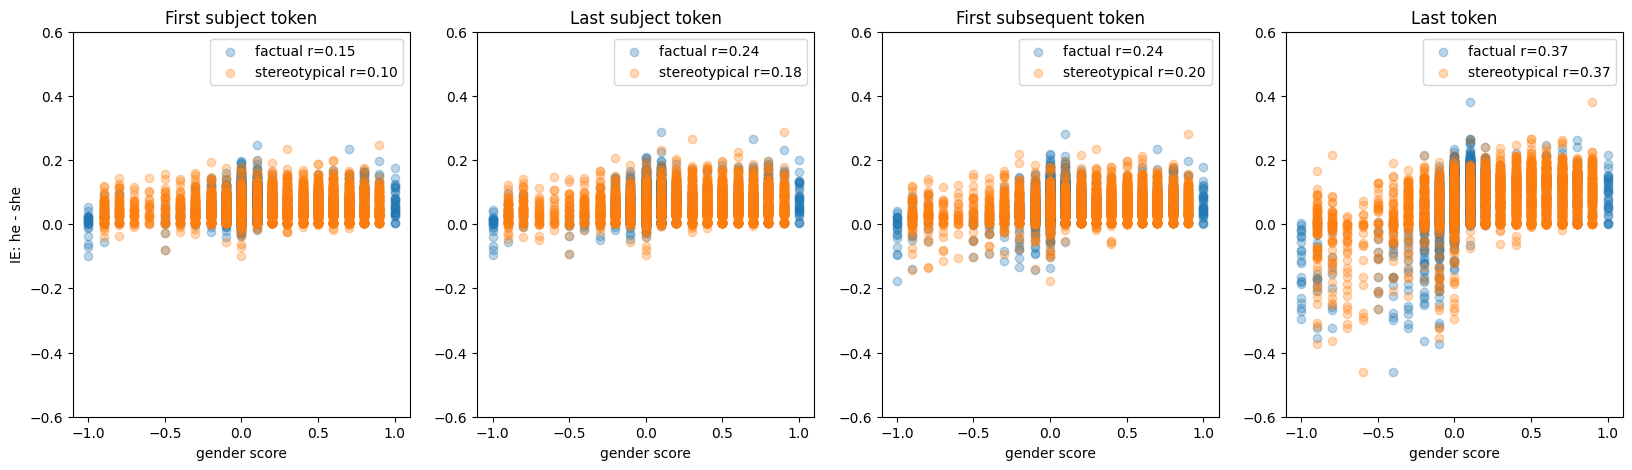

In [24]:
plot_effect_against_bias(data, professions, kind="mlp", layer=28)

Plotting mlp at layer 29


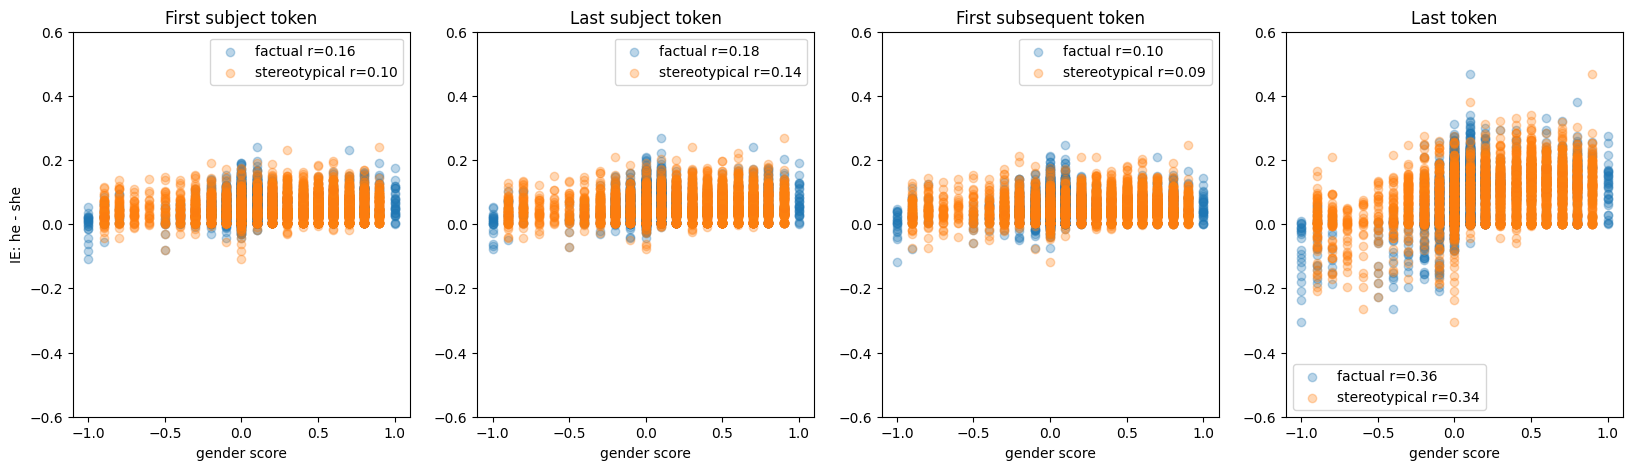

In [25]:
plot_effect_against_bias(data, professions, kind="mlp", layer=29)

Plotting mlp at layer 31


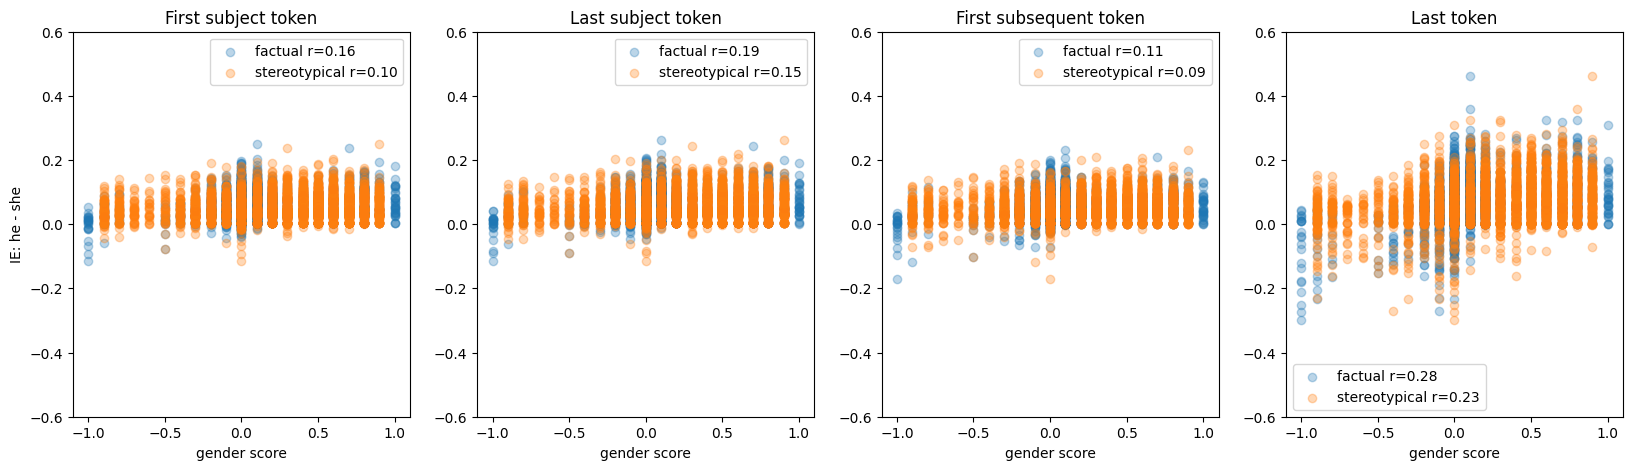

In [26]:
plot_effect_against_bias(data, professions, kind="mlp", layer=31)

Plotting mlp at layer 40


IndexError: index 40 is out of bounds for axis 1 with size 40

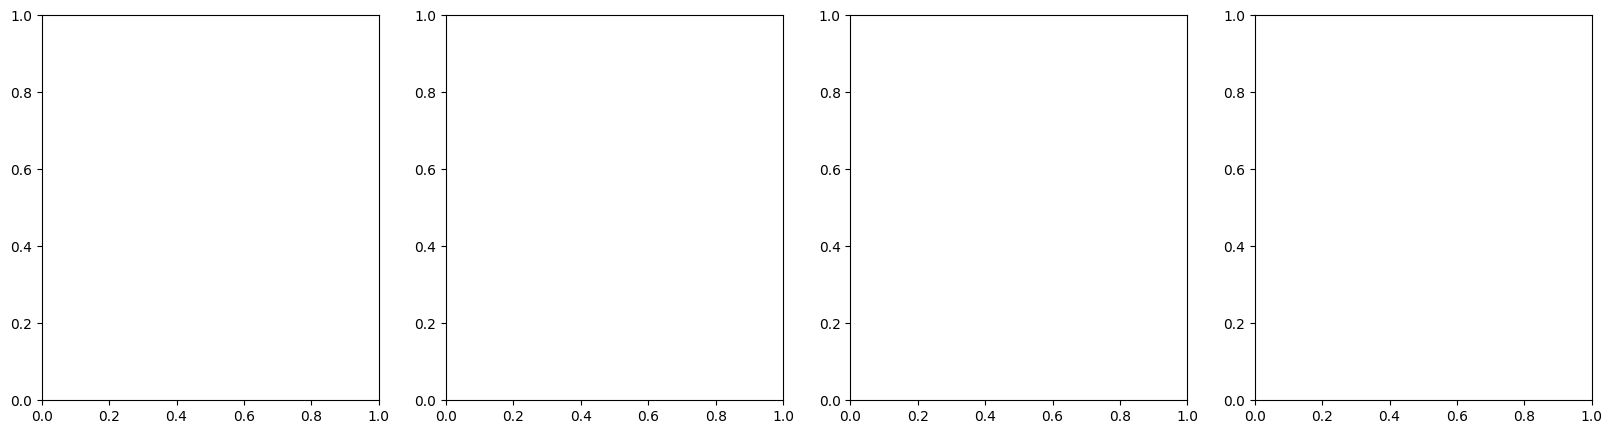

In [27]:
plot_effect_against_bias(data, professions, kind="mlp", layer=40)

In [ ]:
plot_effect_against_bias(data, professions, kind="mlp", layer=45)

In [ ]:
plot_effect_against_bias(data, professions, kind="mlp", layer=47)

In [ ]:
plot_effect_against_bias(data, professions, kind="mlp", layer=50)

In [ ]:
plot_effect_against_bias(data, professions, kind="mlp", layer=51)

In [ ]:
plot_effect_against_bias(data, professions, kind="mlp", layer=53)

In [ ]:
plot_effect_against_bias(data, professions, kind="mlp", layer=55)

Plotting attention IE against bias scores:

In [ ]:
plot_effect_against_bias(data, professions, kind="attn", layer=0)

In [ ]:
plot_effect_against_bias(data, professions, kind="attn", layer=27)

In [ ]:
plot_effect_against_bias(data, professions, kind="attn", layer=31)

Plotting latent state IE against bias scores:

In [ ]:
plot_effect_against_bias(data, professions, kind="null", layer=0)

In [ ]:
plot_effect_against_bias(data, professions, kind="null", layer=5)

In [ ]:
plot_effect_against_bias(data, professions, kind="null", layer=10)

In [ ]:
plot_effect_against_bias(data, professions, kind="null", layer=15)

In [ ]:
plot_effect_against_bias(data, professions, kind="null", layer=20)

In [ ]:
plot_effect_against_bias(data, professions, kind="null", layer=24)

In [ ]:
plot_effect_against_bias(data, professions, kind="null", layer=25)

In [ ]:
plot_effect_against_bias(data, professions, kind="null", layer=26)

In [ ]:
plot_effect_against_bias(data, professions, kind="null", layer=27)

In [ ]:
plot_effect_against_bias(data, professions, kind="null", layer=28)

In [ ]:
plot_effect_against_bias(data, professions, kind="null", layer=31)

## Observation:
Correlation between factually attributed and IE is generally stronger than correlation between stereotypical and IE.
In the last token, we see gradual increase of correlation with the layer number. Interestingly, there are IE scores of MLPs in last layers negatively correlated with the bias scores (are there countering bias?, is it negative feedback?, result of the intervention?).





